## •	Introduction where you discuss the business problem and who would be interested in this project.


## Introduction:

Covered Bonds are a type of investment that is popular in Europe, with some markets, like Germany and France, having more than 300 Billion Euros in bonds outstanding as of the year 2019. This type of bond was first issued in Brazil in late 2018, after the approval from the Brazilian Central Bank.

Covered Bonds consist of a portfolio of real estate contract assets, which serve as a guarantee for the investments to be offered to clients of financial institutions. Basically, when you invest in a Covered Bond, such paper is guaranteed by the receivables of a real estate financing contract. In case of default of the institution, the investor can be paid using these receivables.

All contracts under the issuing of a Covered Bond have to be manually verified by a third-party company hired to oversee the whole operation, called the Fiduciary Agent. This agent will evaluate every contract and tell the financial institution if such contracts are good for being part of the asset portfolio.

The problem here is that some contracts are rejected, and we want to gather data from this – is there any city with more contracts rejected? Maybe the reasons for the rejection are different based on the city?


## •	Data where you describe the data that will be used to solve the problem and the source of the data.

## Description of the data:

The data that will be used here is a fictitious (even though I work for a Fiduciary Agent company, I cannot and will not use real data in any shape or form for the purposes of this work) csv spreadsheet of the contracts that are candidates of composing the asset portfolio.
This spreadsheet includes the reference number of that contract, the city from where this contract comes from, and the status, which informs us if the contract is ok to he be included under the asset portfolio, or if it was rejected (and why, in this case).



## •	Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

## Methodology

The first thing we have to do is import the dataset (which is the BondsStatus.csv file described above).


In [18]:
#First thing is to import pandas and read the file. I preferred to use the embedded "drop files here" option from the notebooks.

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_958146e863d847d38c512ed8abf427d1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EprCFas4mpa_l7pYDBZtOMPhtsqPT_tDvNgFD8goupCM',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_958146e863d847d38c512ed8abf427d1.get_object(Bucket='myfinalassignementcapstone-donotdelete-pr-aqeelk1qdgo6vu',Key='BondsStatus.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,REFERENCE,CITY,STATUS
0,10075,RIO DE JANEIRO,OK
1,10131,RIO DE JANEIRO,REJECTED - SIGNATURES MISSING
2,10285,SALVADOR,OK
3,10404,SALVADOR,OK
4,10574,RIO DE JANEIRO,REJECTED - PAGES MISSING


Above, we can see the first 5 rows of our CSV file. Its a small sample that already show some types of status.

In [19]:
print(df_data_0.dtypes)

REFERENCE     int64
CITY         object
STATUS       object
dtype: object


Just for the sake of it, on the above cell we used the dtypes function to see which data types we are working with.

In [20]:
#Value Counting to know how many occurences of each Status type we are dealing with
df_data_0['STATUS'].value_counts()

OK                               1874
REJECTED - PAGES MISSING           96
REJECTED - SIGNATURES MISSING      29
Name: STATUS, dtype: int64

We have an interesting insight from the above results. From the 2000 values in the .csv file, we have 1874 contracts with OK status - which is good, it means that the financial institutions will be able to use most of the contracts that were given for verification to the Fiduciary Agent. Also, we know that we have 96 contracts with pages missing, and 29 with signatures missing.

In [21]:
df_data_0['CITY'].value_counts()

RIO DE JANEIRO    911
SALVADOR          746
SÃO PAULO         342
Name: CITY, dtype: int64

Now we are going deeper into the analysis. Using the value counts for the city column, we now know that there are 911 contracts in Rio, 746 in Salvador and 342 in Sao Paulo.

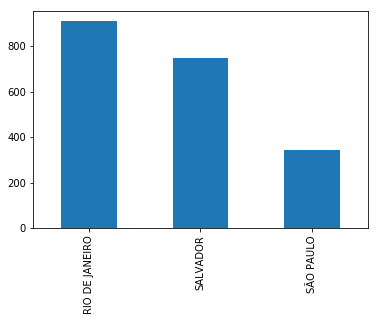

In [23]:
df_data_0['CITY'].value_counts().plot(kind='bar');

Using the plot function for a bar graph, we can see facilitate the visualization.

In [78]:
df_data_0.groupby(["CITY", "STATUS"]).size()

CITY            STATUS                       
RIO DE JANEIRO  OK                               854
                REJECTED - PAGES MISSING          46
                REJECTED - SIGNATURES MISSING     11
SALVADOR        OK                               703
                REJECTED - PAGES MISSING          31
                REJECTED - SIGNATURES MISSING     12
SÃO PAULO       OK                               317
                REJECTED - PAGES MISSING          19
                REJECTED - SIGNATURES MISSING      6
dtype: int64

In [87]:
newdf = pd.crosstab(index=df_data_0['CITY'], columns=df_data_0['STATUS']).stack()/len(df_data_0)
>>> print(newdf)

CITY            STATUS                       
RIO DE JANEIRO  OK                               0.427214
                REJECTED - PAGES MISSING         0.023012
                REJECTED - SIGNATURES MISSING    0.005503
SALVADOR        OK                               0.351676
                REJECTED - PAGES MISSING         0.015508
                REJECTED - SIGNATURES MISSING    0.006003
SÃO PAULO       OK                               0.158579
                REJECTED - PAGES MISSING         0.009505
                REJECTED - SIGNATURES MISSING    0.003002
dtype: float64


## Results

Now, using crosstab, we can compare the percentages of each type of status for each city. Judging by these results, we can conclude that there are no cities with a considerably higher number of Rejected occurences than others. Also, as verified above, the number of Rejected occurrences can be considered small next to the contracts with OK status

## Discussion

The results were somewhat expected - if the Fiduciary Agent detected a high number of Rejected contracts, they would most likely contact the financial institutions in order to know what can be done to get better contracts - be it better scanned versions of them, for example, or a better sorting by the financial institution itself.

## Conclusion

The above study was conducted in order to have a better knowledge if there is any city with a really higher incidence of Rejected contracts in comparison to other. After such analysis, considering that all three cities have lower than 3% of rejected contracts (closer to 2%), we can infer that no city has a considerable number of Rejected contracts, so the operation might continue as usual, without the Fiduciary Agent having to interfere or communicate anything to the financial institutions involved.